In [1]:
import pandas as pd

file2 = "/home/ritesh/Desktop/MOLECULES/morgan/Smiles.csv"
file1 = "/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update.csv"

smiles1 = pd.read_csv(file1, usecols=["SMILES"])
smiles2 = pd.read_csv(file2, usecols=["SMILES"])

In [10]:
import rdkit
from rdkit import Chem

smiles1['mol'] = smiles1['SMILES'].apply(Chem.MolFromSmiles)
smiles2['mol'] = smiles2['SMILES'].apply(Chem.MolFromSmiles)

from rdkit import Chem
from rdkit.Chem import AllChem

def generate_2d_sdf(smiles_df, output_file):
    writer = Chem.SDWriter(output_file)

    for i, row in smiles_df.iterrows():
        smiles = row["SMILES"]
        
        mol = Chem.MolFromSmiles(smiles)
        
        if mol is not None:
            AllChem.Compute2DCoords(mol)
            
            # Set a property on each molecule to store its corresponding SMILES string
            mol.SetProp("_Name", str(i))
            mol.SetProp("SMILES", smiles)
            
            writer.write(mol)

    writer.close()

output_file1 = "/home/ritesh/Desktop/MOLECULES/morgan/smiles1_2d.sdf"
output_file2 = "/home/ritesh/Desktop/MOLECULES/morgan/smiles2_2d.sdf"
generate_2d_sdf(smiles1, output_file1)
generate_2d_sdf(smiles2, output_file2)

In [17]:
import rdkit
from rdkit.Chem.rdchem import BondTopology

def generate_graphs_from_sdf(sdf_file):
    mol_supplier = Chem.SDMolSupplier(sdf_file)

    graphs = []
    for mol in mol_supplier:
        # Generate a molecular graph from RDKit Mol object with explicit hydrogens
        h_mol = Chem.AddHs(mol)
        
        g = nx.Graph()
        
        for atom in h_mol.GetAtoms():
            g.add_node(atom.GetIdx(), atomic_num=atom.GetAtomicNum())
            
        for bond in h_mol.GetBonds():
            atom1_idx = bond.GetBeginAtomIdx()
            atom2_idx = bond.GetEndAtomIdx()
            bond_type = bond.GetBondTopology().BondType
            
            if bond_type == BondTopology.BondType.DOUBLE:
                # Add an edge with a label indicating a double bond
                g.add_edge(atom1_idx, atom2_idx, bond_type='double')
                
            elif bond_type == BondTopology.BondType.TRIPLE:
                # Add an edge with a label indicating a triple bond
                g.add_edge(atom1_idx, atom2_idx, bond_type='triple')
                
            else:
                # Add an edge with default single-bond label
                g.add_edge(atom1_idx, atom2_idx)
        
        graphs.append(g)

    return graphs


# Path to the generated SDF files
sdf_file1 = "/home/ritesh/Desktop/MOLECULES/morgan/smiles1_2d.sdf"
sdf_file2 = "/home/ritesh/Desktop/MOLECULES/morgan/smiles2_2d.sdf"

# Generate graphs from each SDF file
graphs1 = generate_graphs_from_sdf(sdf_file1)
graphs2 = generate_graphs_from_sdf(sdf_file2)



ImportError: cannot import name 'BondTopology' from 'rdkit.Chem.rdchem' (/home/ritesh/anaconda3/envs/MOLECULES/lib/python3.11/site-packages/rdkit/Chem/rdchem.so)

In [60]:
# Assuming you have already trained your models (model_1 and model_2)

# Get embeddings for specific nodes
node_embeddings = model_1.kv.vectors

# Print the first 10 node embeddings
print("Node Embeddings:")
for i in range(10):
    print(f"Node {i}: {node_embeddings[i]}")

# Get embedding for a specific word
word_embedding = model_1.kv.word_vec("your_word")

print("\nWord Embedding:")
print(word_embedding)

NameError: name 'model_1' is not defined

In [58]:
print("Number of graphs in smiles1:", len(smiles1['graph']))
print("Number of graphs in smiles2:", len(smiles2['graph']))

Number of graphs in smiles1: 61
Number of graphs in smiles2: 223


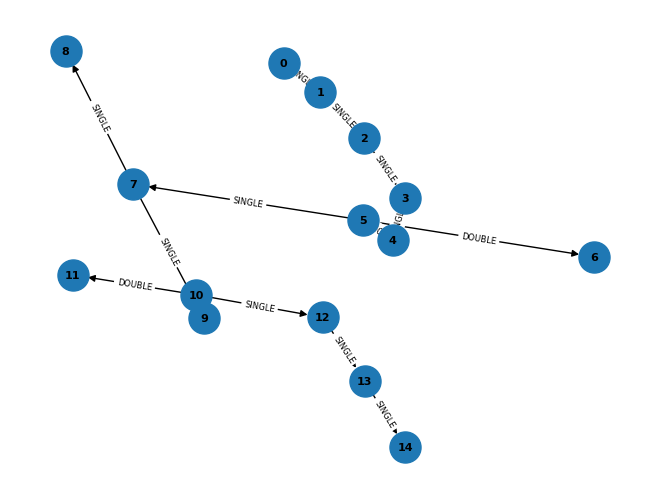

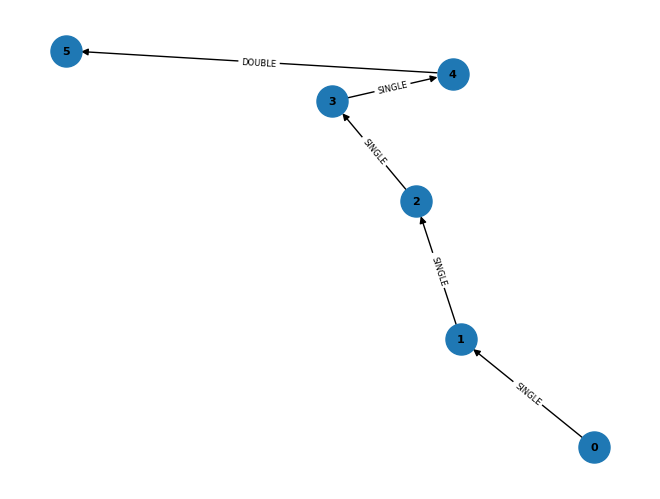

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to plot a graph using NetworkX's draw function
# Modified plot_graph function with a different layout algorithm
def plot_graph(graph, layout_algorithm='spring'):
    if layout_algorithm == 'spring':
        pos = nx.spring_layout(graph, seed=42)
    elif layout_algorithm == 'circular':
        pos = nx.circular_layout(graph)
    elif layout_algorithm == 'random':
        pos = nx.random_layout(graph)
    elif layout_algorithm == 'shell':
        pos = nx.shell_layout(graph)
    elif layout_algorithm == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(graph)

    nx.draw(graph, pos, with_labels=True, node_size=500, font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'bond_type')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=6)
    plt.show()

# Plot the first three graphs from 'smiles1'
for i in range(1):
    plot_graph(smiles1['graph'].iloc[i])

# Plot the first three graphs from 'smiles2'
for i in range(1):
    plot_graph(smiles2['graph'].iloc[i])


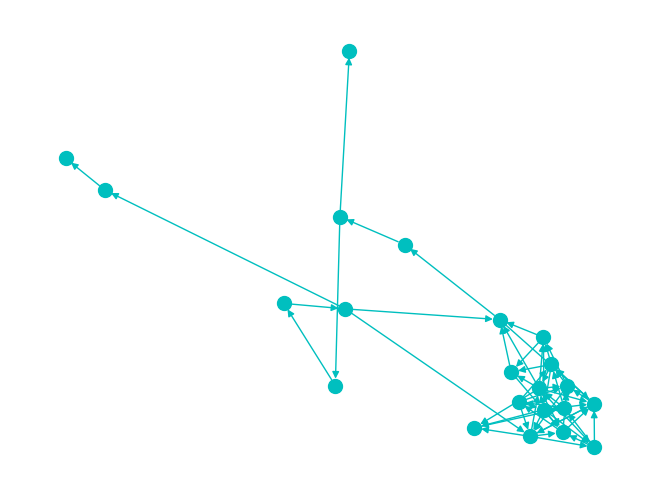

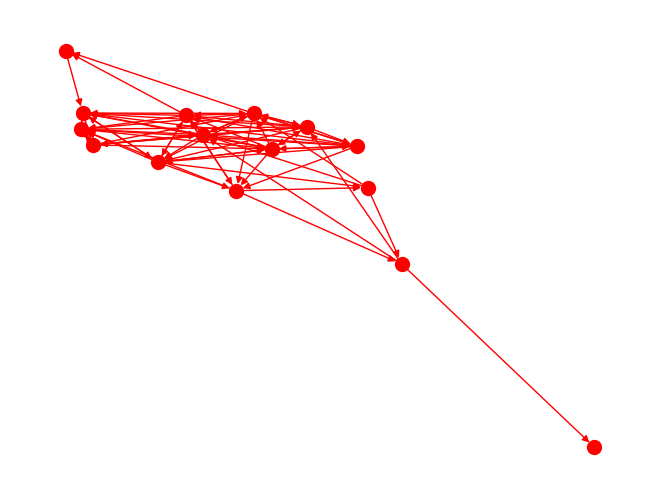

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Combine all graphs in 'smiles1' into a single graph
combined_graph_smiles1 = nx.DiGraph()
for idx, graph in smiles1['graph'].items():
    combined_graph_smiles1 = nx.compose(combined_graph_smiles1, graph)

# Combine all graphs in 'smiles2' into a single graph
combined_graph_smiles2 = nx.DiGraph()
for idx, graph in smiles2['graph'].items():
    combined_graph_smiles2 = nx.compose(combined_graph_smiles2, graph)

# Function to plot the combined graph for 'smiles1'
def plot_combined_graph_smiles1(graph):
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=False, node_size=100, font_size=8, font_weight='bold', node_color='c', edge_color='c')
    plt.show()

# Function to plot the combined graph for 'smiles2'
def plot_combined_graph_smiles2(graph):
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=False, node_size=100, font_size=8, font_weight='bold', node_color='r', edge_color='r')
    plt.show()

# Plot the combined graph for 'smiles1'
plot_combined_graph_smiles1(combined_graph_smiles1)

# Plot the combined graph for 'smiles2'
plot_combined_graph_smiles2(combined_graph_smiles2)


In [34]:
import torch
import numpy as np
from gensim.models.poincare import PoincareModel

# Load your dataset as a list of PyTorch Geometric Data objects (assuming smiles1 and smiles2 are already prepared)
dataset = smiles1['torch_data'].tolist()

# Prepare the graph data for training embeddings using gensim Poincaré model (assuming edges are stored in edge_index)
edges = [(edge[0].item(), edge[1].item()) for data in dataset for edge in data.edge_index.t().tolist()]

# Train the Poincaré model on your graph data
model = PoincareModel(edges, negative=2)
model.train(epochs=200)

# After training, you can extract the hyperbolic embeddings for each node in your test datasets (smiles1 and smiles2)
embeddings_smiles1 = []
with torch.no_grad():
    model.eval()
    for i in range(len(smiles1)):
        x_test, _ = smiles1.loc[i]['torch_data'].x.to(device).float(), None

        # Get the embedding of each node feature vector using its index as a string identifier.
        embedding_vecs_smiles1 = [model.kv[str(j)] for j in range(x_test.size(0))]

        # Average the embeddings to get a single representation per graph/example.
        avg_embedding_vec_smiles1 = np.mean(embedding_vecs_smiles1, axis=0)

        embeddings_smiles.append(avg_embedding_vec_smilessm)

embeddings_smiles2 = []
with torch.no_grad():
    model.eval()
    for i in range(len(smiles2)):
        x_test, _ = smiles2.loc[i]['torch_data'].x.to(device).float(), None

        # Get the embedding of each node feature vector using its index as a string identifier.
        embedding_vecs_smiles2 = [model.kv[str(j)] for j in range(x_test.size(0))]

        # Average the embeddings to get a single representation per graph/example.
        avg_embedding_vec_smiles2 = np.mean(embedding_vecs_smiles2, axis=0)

        embeddings_smiles.append(avg_embedding_vec_smilessm)
        
# Store the resulting embeddings as desired (e.g., save to a file)
np.save("hyperbolic_embeddings_smiles1.npy", np.array(embeddings_smiles1))
np.save("hyperbolic_embeddings_smiles2.npy", np.array(embeddings_smilies2))

AttributeError: 'int' object has no attribute 'item'

In [27]:
import torch


In [36]:
from gensim.models.poincare import PoincareModel


In [38]:
# Prepare the graph data for training embeddings using gensim Poincaré model
edges = []
for data in dataset:
    edge_index = data.edge_index.t().tolist()
    edges.extend([(edge[0], edge[1]) for edge in edge_index])

# Train the Poincaré model on your graph data
model = PoincareModel(edges, negative=2)
model.train(epochs=200)

# After training, you can extract the hyperbolic embeddings for each node in your test dataset
embeddings = []
with torch.no_grad():
    for i in range(len(dataset)):
        # Assuming each example has x and y attributes representing features and labels respectively.
        x_test, y_test = dataset[i].x.to(device).float(), dataset[i].y.to(device)

        # Get the embedding of each node feature vector using its label as a string identifier.
        embedding_vecs = [model.kv[str(label.item())] for label in y_test]

        # Average the embeddings to get a single representation per graph/example.
        avg_embedding_vec = np.mean(embedding_vecs, axis=0)
        
        embeddings.append(avg_embedding_vec)

# Store the resulting embeddings as desired (e.g., save to a file)
np.save("hyperbolic_embeddings.npy", np.array(embeddings))

AttributeError: 'NoneType' object has no attribute 'to'

In [19]:
import torch_geometric
print(torch_geometric.__version__)


2.3.1


In [20]:
from torch_geometric.nn import PoincareConv


ImportError: cannot import name 'PoincareConv' from 'torch_geometric.nn' (/home/ritesh/anaconda3/envs/MOLECULES/lib/python3.11/site-packages/torch_geometric/nn/__init__.py)